# Un poco de graficación 3D

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Algunas funciones útiles de Numpy

### Vectorización de funciones escalares

Si bien en **Numpy** las funciones están vectorizadas, hay ocasiones en que las funciones son el resultado de una simulación, optimización, o integración, y si bien la paralelización puede ser trivial, no puede ser utilizada directamente con un vector. Para ello existe la función `vectorize()`. Veamos un ejemplo, calculando la función *coseno()* como la integral del *seno()*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


In [3]:
def mi_cos(t):
  return 1-integrate.quad(np.sin, 0, t)[0]

In [4]:
mi_cos(np.pi/4)

0.7071067811865476

Para calcular sobre un conjunto de datos, debemos realizar una iteración llamando a esta función en cada paso:


In [5]:
x = np.linspace(-np.pi,np.pi,30)

In [6]:
try:
    mi_cos(x)
except Exception as e:
    print("No funcionó: \n", e)

No funcionó: 
 The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


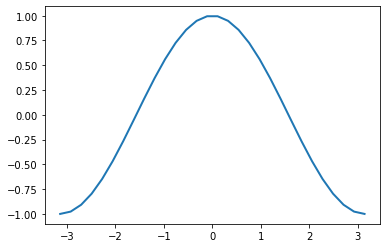

In [7]:
y = np.zeros(x.size)
for i,xx in enumerate(x):
  y[i] = mi_cos(xx)
plt.plot(x,y)

Como conveniencia, para evitar tener que hacer explícitamente el bucle `for` existe la función `vectorize`, que toma como argumento a una función que toma y devuelve escalares, y retorna una función equivalente que acepta arrays:

In [8]:
coseno = np.vectorize(mi_cos)

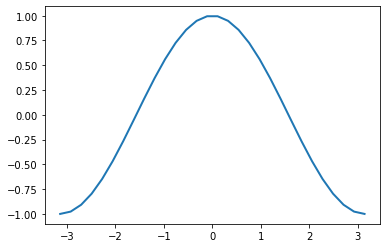

In [9]:
plt.plot(x, coseno(x), '-')

Un segundo ejemplo podría ser la función que hicimos para calcular $\pi$ utilizando el método de Monte Carlo

In [14]:
def estima_pi(N):
  y = np.random.random((2, N))
  c = np.square(y).sum(axis=0) < 1
  return 4 * c.sum() / N

pi_areas = np.vectorize(estima_pi)  # Versión que acepta arrays

In [15]:
estima_pi(10000)

3.1176

In [16]:
N = 1000*np.ones(10, dtype='int')
print('N=', N)
print('shape=', N.shape)
pi_areas(N)

N= [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
shape= (10,)


array([3.116, 3.092, 3.06 , 3.112, 3.112, 3.164, 3.112, 3.2  , 3.032,
       3.14 ])

Estimación de π ≅ 3.1410 ± 0.0163


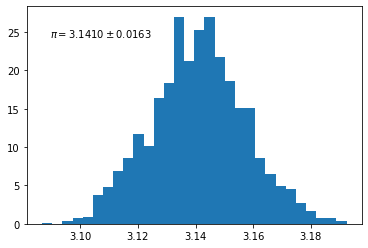

In [17]:
Ns = 10000 * np.ones(2000, dtype=int)
y = pi_areas(Ns)
pi = y.mean()
error = y.std()

d= plt.hist(y,bins=30, density=True)
xpos= d[1].min() +(d[1].max() - d[1].min())/40
plt.text(xpos, 0.9*d[0].max(), r"$\pi = {:.4f} \pm {:.4f}$".format(pi,error))

print('Estimación de π ≅ {:.4f} ± {:.4f}'.format(pi, error))

## Gráficos y procesamiento sencillo en 2D

### Histogramas en 2D

Así como trabajamos con histogramas de arrays unidimensionales en forma sencilla usando `plt.hist()` o `np.histogram()`, podemos hacerlo de una manera similar trabajando en el plano. Empecemos creando algunos datos

In [18]:
np.random.seed(0)
n = 100000
x = np.r_[np.random.normal(size=n), np.random.normal(loc=3, size=n)]
y = 2.0 + 4.0 * x - x**2 / 5 + 2.0 * \
    np.r_[np.random.normal(size=n), np.random.normal(loc=-3, size=n)]

Acá la notación `r_[]` hace concatenación por filas. Veamos que forma tienen `x` e `y`

In [19]:
x.shape

(200000,)

Para crear el histograma usamos simplemente la función `hist2d`. Que realiza la grilla acorde al argumento `bins` y luego calcula el histograma en dos dimensiones

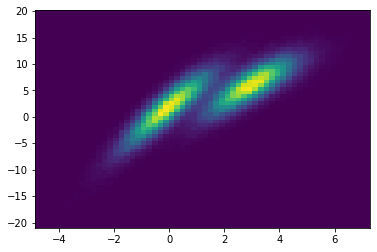

In [20]:
#fig1= plt.figure()
H= plt.hist2d(x, y, bins=60)

Aquí pusimos igual número de "cajas" en cada dimensión. También podemos pasarle un array con distinto número de cajas

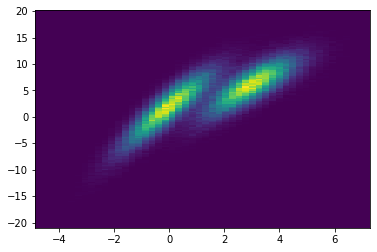

In [21]:
fig1= plt.figure()
H= plt.hist2d(x, y, bins=[50,150])

Por supuesto podemos cambiar el esquema de colores utilizado. Para ello le damos explícitamente el argumento `cmap` especificando el "colormap" deseado:

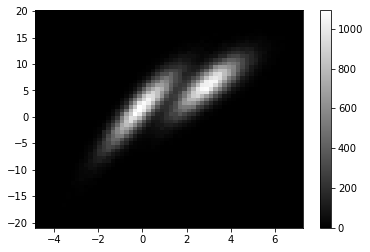

In [22]:
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, cmap='gray')
plt.colorbar();

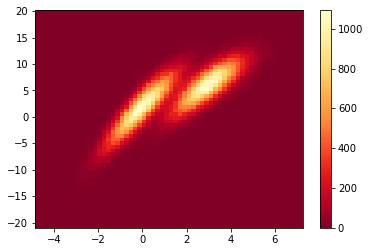

In [23]:
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, cmap=plt.cm.YlOrRd_r)
plt.colorbar();

De la misma manera, si queremos realizarlo en escala logarítmica debemos pasarle una escala de colores adecuada

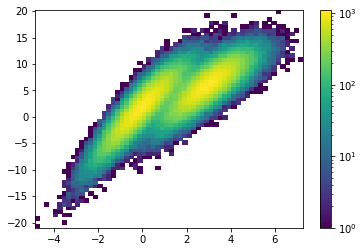

In [25]:
from matplotlib.colors import LogNorm
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, norm=LogNorm())
plt.colorbar();

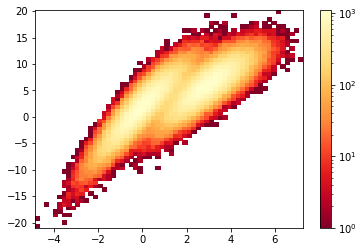

In [26]:
from matplotlib.colors import LogNorm
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, cmap=plt.cm.YlOrRd_r, norm=LogNorm())
plt.colorbar();

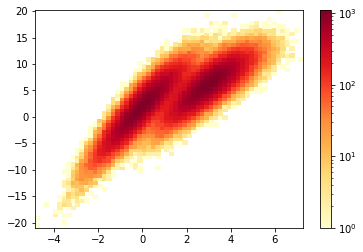

In [27]:
from matplotlib.colors import LogNorm
fig1= plt.figure()
H= plt.hist2d(x, y, bins=60, cmap=plt.cm.YlOrRd, norm=LogNorm())
plt.colorbar();

### Histogramas con partición hexagonal

Vemos que `plt.hist()` realiza una partición rectangular del dominio. Puede ser más agradable a la vista realizar una partición en hexágonos. Para ello está la función `plt.hexbin()` 

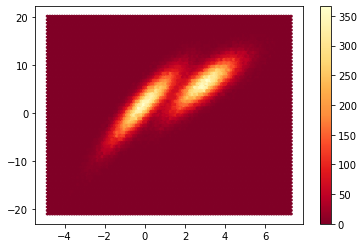

In [28]:
fig1= plt.figure()
plt.hexbin(x, y, cmap=plt.cm.YlOrRd_r)
plt.colorbar();

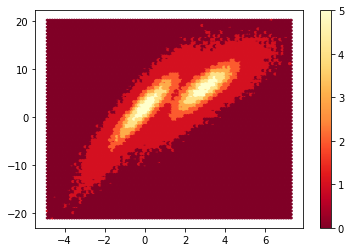

In [29]:
fig1= plt.figure()
plt.hexbin(x, y, bins=6, cmap=plt.cm.YlOrRd_r)
plt.colorbar();

o, en escala logarítmica:

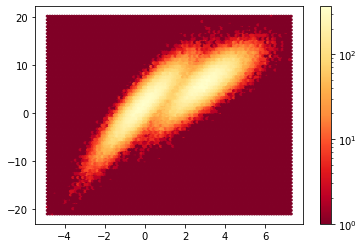

In [30]:
fig1= plt.figure()
plt.hexbin(x, y, bins='log', cmap=plt.cm.YlOrRd_r)
plt.colorbar();

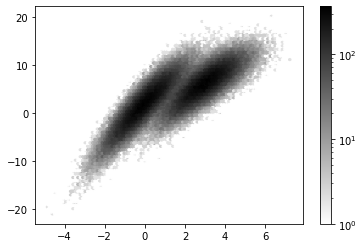

In [31]:
fig1= plt.figure()
plt.hexbin(x, y, bins='log', cmap='gray_r')
plt.colorbar();

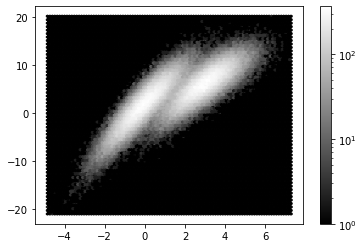

In [32]:
fig1= plt.figure()
plt.hexbin(x, y, bins='log', cmap='gray')
plt.colorbar();

### Gráficos de contornos



In [33]:
H[0].shape, H[1].shape, H[2].shape

((60, 60), (61,), (61,))

In [36]:
H[2]

array([-20.97716804, -20.29168082, -19.60619359, -18.92070637,
       -18.23521914, -17.54973191, -16.86424469, -16.17875746,
       -15.49327024, -14.80778301, -14.12229579, -13.43680856,
       -12.75132133, -12.06583411, -11.38034688, -10.69485966,
       -10.00937243,  -9.3238852 ,  -8.63839798,  -7.95291075,
        -7.26742353,  -6.5819363 ,  -5.89644908,  -5.21096185,
        -4.52547462,  -3.8399874 ,  -3.15450017,  -2.46901295,
        -1.78352572,  -1.09803849,  -0.41255127,   0.27293596,
         0.95842318,   1.64391041,   2.32939763,   3.01488486,
         3.70037209,   4.38585931,   5.07134654,   5.75683376,
         6.44232099,   7.12780822,   7.81329544,   8.49878267,
         9.18426989,   9.86975712,  10.55524434,  11.24073157,
        11.9262188 ,  12.61170602,  13.29719325,  13.98268047,
        14.6681677 ,  15.35365493,  16.03914215,  16.72462938,
        17.4101166 ,  18.09560383,  18.78109106,  19.46657828,
        20.15206551])

In [37]:
x0 = 0.5*(H[1][1:]+ H[1][:-1])
y0 = 0.5*(H[2][1:]+ H[2][:-1])
X, Y = np.meshgrid(x0, y0)
Z = H[0]

In [38]:
X.shape, Y.shape, Z.shape

((60, 60), (60, 60), (60, 60))

In [42]:
np.all(X[0] == X[1])

True

In [40]:
np.all(Y[0] == Y[1])

False

In [44]:
np.all(Y[:,0] == Y[:,2])

True

In [45]:
X[0,:10], X[1,:10]

(array([-4.75096788, -4.54866832, -4.34636877, -4.14406921, -3.94176966,
        -3.7394701 , -3.53717055, -3.33487099, -3.13257144, -2.93027188]),
 array([-4.75096788, -4.54866832, -4.34636877, -4.14406921, -3.94176966,
        -3.7394701 , -3.53717055, -3.33487099, -3.13257144, -2.93027188]))

Vamos a usar los datos para hacer los gráficos de contornos

(-12, 15)

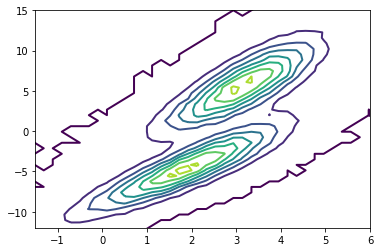

In [46]:
fig1= plt.figure()
CS = plt.contour(X, Y, Z)
plt.xlim((-1.5,6))
plt.ylim((-12,15))

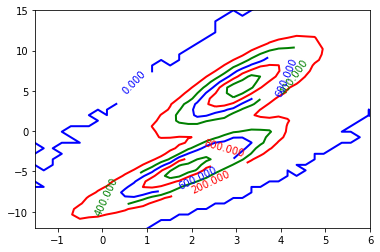

In [51]:
CS = plt.contour(X, Y, Z, 5, colors=('b','r','g'))
plt.clabel(CS, fontsize=10, inline=1)
plt.xlim((-1.5,6))
plt.ylim((-12,15));

También podemos mostrar la imagen con los contornos superpuestos:

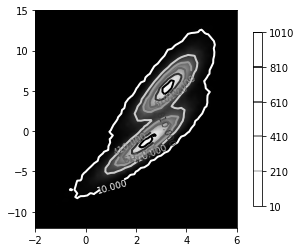

In [55]:
fig1= plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                extent=(-2,6,-12,15), aspect=0.32, cmap=plt.cm.gray)
levels = np.arange(10, 1210, 200)
CS = plt.contour(Z, levels, origin='lower', linewidths=2,
                 extent=(-2,6,-12,15), cmap=plt.cm.gray_r )
plt.clabel(CS, fontsize=9, inline=1)
CB = plt.colorbar(CS, shrink=0.8)

### Superficies y contornos

#### Superficies

Para realizar gráficos "realmente" en 3D debemos importar `Axes3D`

In [56]:
from mpl_toolkits.mplot3d import Axes3D
#plt.style.use('classic')

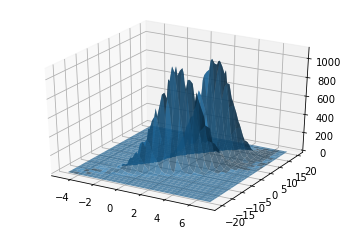

In [57]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, alpha=.7)

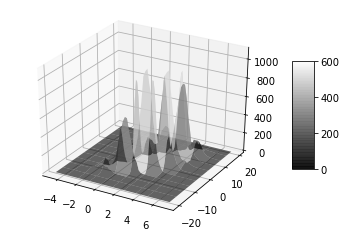

In [58]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.gray, rstride=6,cstride=6, lw=1, alpha=0.6)
ax.set_zlim(0, 1100.)
fig.colorbar(surf, shrink=0.5, aspect=5);

In [59]:
help(ax.plot_surface)

Help on method plot_surface in module mpl_toolkits.mplot3d.axes3d:

plot_surface(X, Y, Z, *args, norm=None, vmin=None, vmax=None, lightsource=None, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Create a surface plot.
    
    By default it will be colored in shades of a solid color, but it also
    supports color mapping by supplying the *cmap* argument.
    
    .. note::
    
       The *rcount* and *ccount* kwargs, which both default to 50,
       determine the maximum number of samples used in each direction.  If
       the input data is larger, it will be downsampled (by slicing) to
       these numbers of points.
    
    Parameters
    ----------
    X, Y, Z : 2d arrays
        Data values.
    
    rcount, ccount : int
        Maximum number of samples used in each direction.  If the input
        data is larger, it will be downsampled (by slicing) to these
        numbers of points.  Defaults to 50.
    
        .. versionadded:: 2.0
    
    rstride

#### Contornos en 3D


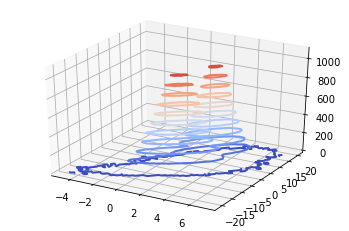

In [60]:
fig = plt.figure()
ax = fig.gca(projection='3d')
cset = ax.contour(X, Y, Z,10, cmap=plt.cm.coolwarm)

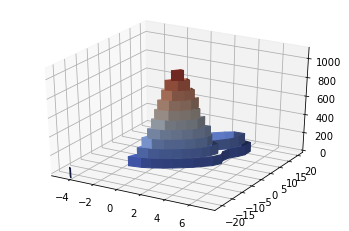

In [63]:
fig = plt.figure()
ax = fig.gca(projection='3d')
cset = ax.contour(X, Y, Z, 10, extend3d=True, cmap=plt.cm.coolwarm)

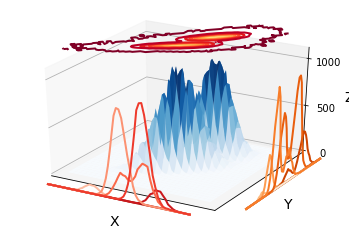

In [65]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, lw=0, alpha=0.9, cmap=plt.cm.Blues)
cset = ax.contour(X, Y, Z, zdir='z', offset=1300, cmap=plt.cm.YlOrRd_r)
cset = ax.contour(X, Y, Z, zdir='x', offset=10, cmap=plt.cm.Oranges)
cset = ax.contour(X, Y, Z, zdir='y', offset=-30, cmap=plt.cm.Reds)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([0, 500, 1000]);



Veamos otro ejemplo. Modifiquemos el gráfico anterior para llenar los contornos laterales, utilizando la función `contourf()` en lugar de `contour()`

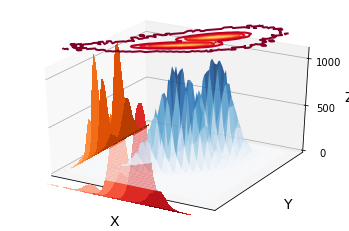

In [67]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, lw=0, alpha=0.6, cmap=plt.cm.Blues)
cset = ax.contour(X, Y, Z, zdir='z', offset=1300, cmap=plt.cm.YlOrRd_r)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-5, cmap=plt.cm.Oranges)
cset = ax.contourf(X, Y, Z, zdir='y', offset=-30, cmap=plt.cm.Reds)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([0, 500, 1000]);



#### Gráficos de campos vectoriales

Para realizar gráficos de campos (de velocidades, fuerzas, etc) podemos utilizar la función `quiver()`, que grafica flechas en cada punto, con una dirección y longitud dada


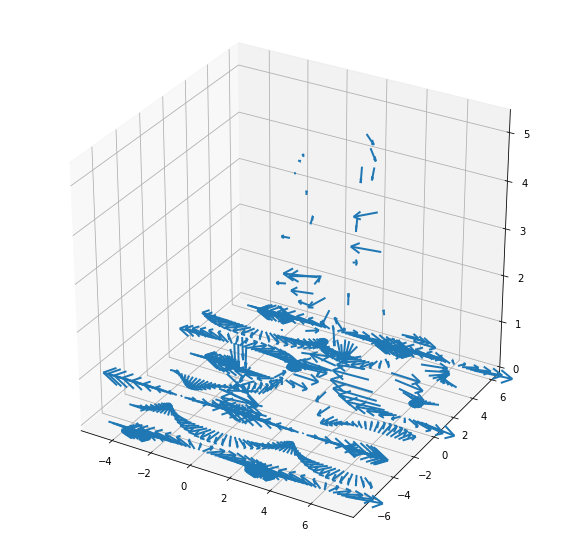

In [68]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
d=8
x =  X[::d]
y =  Y[::d]/3
z =  Z[::d]/200
# Creamos las direcciones para cada punto
u = 5*np.sin(x) * np.cos(y) * np.cos(z)
v = - 2* np.cos( x) * np.sin( y) * np.cos(z)
w = np.cos(x) * np.cos(y) * np.sin(z)

ax.quiver(x, y, z, u, v, w, length=0.5, arrow_length_ratio=0.3);


Veamos un ejemplo de la documentación de **Matplotlib**

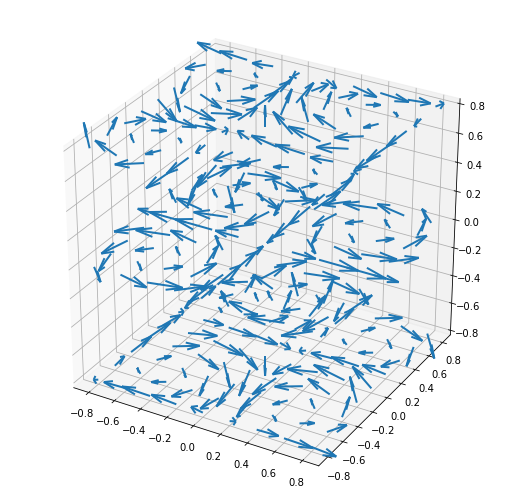

In [73]:

fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.3, arrow_length_ratio=0.5);

Más información sobre este tipo de gráficos en http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html